In [4]:
# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [5]:
import numpy as np #importation de bibliothèque mathematique

### Simulation du lancé de dé

In [6]:
def Roll():
    return int(np.random.choice(range(1,7),1)) 
#la fonction retourne le résultat de choisir un nombre entre 1 et 6 d'une façon aléatoire.

In [7]:
Roll()#appeler la fonction

4

### Compléter le code et commenter

In [8]:
A = 0 #position 
NA = 0 #la valeur de dé aprés lancement
S = 10 #la position de la cible
c = 0 #compteur
while (A<S):#tantqu'on n'a pas atteindre S (la position de la cible)
    NA=Roll()
    if NA == 6 and A==0:
        A=1 #on avance par 1 car NA =6 pour le premier lancement
        c=c+1 #incrémentation de valeur de variable position
        print(NA,A,c)
    elif A>0 and NA+A<S: #on ñ'a pas encore atteindre la cible
        A=A+NA
        c=c+1
        print(NA,A,c)
    elif NA+A == S : #if NA+A égale la valeur de cible
        A=A+NA
        c=c+1
        print(NA,A,c)
        break #Nous avons atteint la position cible
    else: #si NA différent de 6
        c=c+1
        print(NA,A,c)


3 0 1
6 1 2
2 3 3
2 5 4
3 8 5
3 8 6
1 9 7
6 9 8
6 9 9
4 9 10
4 9 11
3 9 12
5 9 13
2 9 14
6 9 15
2 9 16
3 9 17
5 9 18
1 10 19


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [9]:
def sim(S):
    A = 0 #position 
    NA = 0 #valeur de dé aprés lancement
    c = 0 #compteur
    while (A<S):#tantqu'on n'a pas atteindre S (la position de la cible)
        NA=Roll()
        if NA == 6 and A==0:
            A=1 #on avance par 1 car NA =6 pour le premier lancement
            c=c+1 #incrémentation de valeur de variable position
        elif A>0 and NA+A<S: #on ñ'a pas encore atteindre la cible
            A=A+NA
            c=c+1
        elif NA+A == S : #if NA+A égale la valeur de cible
            A=A+NA
            c=c+1
            break #Nous avons atteint la position cible
        else: #si NA différent de 6
            c=c+1

    return c
    

In [10]:
sim(30) #déterminer le nombre de coupe necessaire pour atteindre la cible

21

In [12]:
### Simulation de $10^5$  scénario 
F=100000
L=[]
for i in range(F):
    L.append(sim(30)) #jouer plusieurs fois et enregistrer les résultats dans une liste
def moy(L):
    m=0
    for j in L:
        m=m+i
    return m/len(L) #retourner l'espérance)
moy(L)  

99999.0

In [13]:
Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)#jouer beaucoups de fois  

In [14]:
ESP=Freq.sum()/10**5 #calculer l'espérance

In [16]:
x=list(range(10,20))

In [17]:
y=[np.fromiter((sim(j) for i in range(5*10**4)),dtype=int).sum()/50000 for j in x]

In [23]:
import matplotlib.pyplot as plt
x=np.linspace(10,20,50)
y=0.2853781818181818 *x + 10.479880363636362

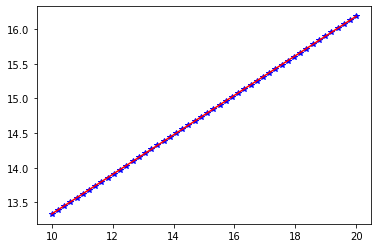

In [24]:
plt.plot(x,y,'b*')# b = bleu
plt.plot(x,y,'r') # r = rouge

In [20]:
from scipy import stats #importer la bibliothèque stat
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [21]:
slope #le coefficient a de l'equation f(x) = ax +b

0.2853781818181818

In [22]:
intercept #le coefficient b de l'equation f(x) = ax +b


10.479880363636362